<a href="https://colab.research.google.com/github/Allam0053/KK/blob/main/KK_tugas_1_nomor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Diketahui
1. Diketahui contoh dataset dengan 8 data sebagai berikut : 

  - A1=(2,10)
  - A2=(2,5)
  - A3=(8,4)
  - A4=(5,8)
  - A5=(7,5)
  - A6=(6,4)
  - A7=(1,2)
  - A8=(4,9)

  ### Soal
  - Gunakan algoritma k-Means dengan satu iterasi dengan jumlah klaster adalah 3 dengan inisial pusat klaster adalah A1, A4, A7. Tuliskan hasil klaster dari 8 data tersebut dan pusat klaster yang terbaru.

  - Lanjutkan dengan iterasi kedua dengan algoritma k-Means kemudian tuliskan hasil klaster dari 8 data tersebut dan pusat klaster yang terbaru.

  - Gunakan algoritma hierarchical clustering (agglomerative) dengan complete-link. Hitung distance matrix tiap tahapan dari dataset di atas dan buatkan hasil klaster dengan dendogramnya.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering as AC

from scipy.cluster.hierarchy import dendrogram

In [ ]:
# init data
df = pd.DataFrame(np.array([[2.0, 10.0], 
                             [2.0, 5.0], 
                             [8.0, 4.0],
                             [5.0, 8.0], 
                             [7.0, 5.0], 
                             [6.0, 4.0],
                             [1.0, 2.0], 
                             [4.0, 9.0]]), columns=['a', 'b'])
df.head()

,a,b
0,2.0,10.0
1,2.0,5.0
2,8.0,4.0
3,5.0,8.0
4,7.0,5.0


### a

In [ ]:
# define pusat centroid awal
init_array = np.array([[2.0, 10.0], 
                 [5.0, 8.0], 
                 [1.0, 2.0]], np.float64)

# init Kmeans dengan param tertentu
km = KMeans(
    n_clusters=3, 
    init=init_array, 
    n_init=1, 
    max_iter=1, # <= iterasi == 1
    tol=0.0001, 
    verbose=0, 
    random_state=None, 
    copy_x=True, 
    algorithm='auto')

# hitung kmeans dari data yang telah diberikan
km.fit(df)

KMeans(algorithm='auto', copy_x=True,
       init=array([[ 2., 10.],
       [ 5.,  8.],
       [ 1.,  2.]]),
       max_iter=1, n_clusters=3, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
# cek cluster center yang baru
km.cluster_centers_

array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]])

In [ ]:
km.labels_

array([0, 2, 1, 1, 1, 1, 2, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


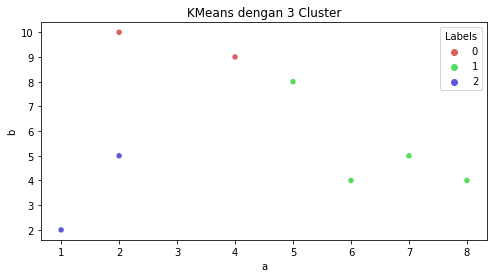

In [ ]:
# menambahkan kolom label pada dataset
df['Labels'] = km.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(df['a'], df['b'], hue=df['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()

### b

In [ ]:
# karena df yang awal sudah ditambahi label, maka dideclare ulang
df = pd.DataFrame(np.array([[2.0, 10.0], 
                             [2.0, 5.0], 
                             [8.0, 4.0],
                             [5.0, 8.0], 
                             [7.0, 5.0], 
                             [6.0, 4.0],
                             [1.0, 2.0], 
                             [4.0, 9.0]]), columns=['a', 'b'])

# init Kmeans dengan param tertentu
km_b = KMeans(
    n_clusters=3, 
    init=init_array, 
    n_init=1, 
    max_iter=2, # <= iterasi == 2
    tol=0.0001, 
    verbose=0, 
    random_state=None, 
    copy_x=True, 
    algorithm='auto')

# hitung kmeans dari df yang telah diberikan
km_b.fit(df)

KMeans(algorithm='auto', copy_x=True,
       init=array([[ 2., 10.],
       [ 5.,  8.],
       [ 1.,  2.]]),
       max_iter=2, n_clusters=3, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
km_b.cluster_centers_

array([[3.  , 9.5 ],
       [6.5 , 5.25],
       [1.5 , 3.5 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


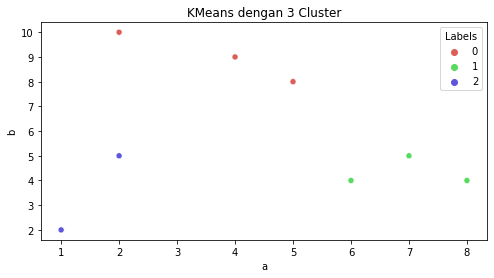

In [ ]:
# menambahkan kolom label pada dataset
df['Labels'] = km_b.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(df['a'], df['b'], hue=df['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()

### c

In [ ]:
# karena df yang awal sudah ditambahi label, maka dideclare ulang
df = pd.DataFrame(np.array([[2.0, 10.0], 
                             [2.0, 5.0], 
                             [8.0, 4.0],
                             [5.0, 8.0], 
                             [7.0, 5.0], 
                             [6.0, 4.0],
                             [1.0, 2.0], 
                             [4.0, 9.0]]), columns=['a', 'b'])

my_ac = AC(n_clusters=None,
          affinity='euclidean', 
          memory=None, 
          connectivity=None, 
          compute_full_tree='auto', 
          linkage='complete', 
          distance_threshold=0)



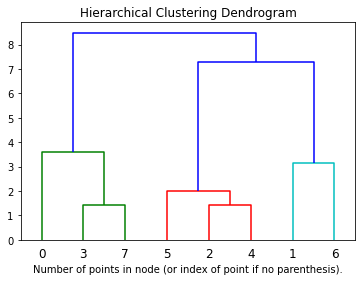

In [ ]:
# function copied from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = df

# setting distance_threshold=0 ensures we compute the full tree.
model = my_ac

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()